In [2]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [3]:
train_dir = './train'
test_dir = './test'

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │     1,382,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401,866 (5.35 MB)

 Trainable params: 1,401,866 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# liberar memoria para amenizar el proceso de entrenamiento
# Liberar la memoria de la GPU
backend.clear_session()


In [9]:
#steps_per_epoch = train_generator.samples // train_generator.batch_size
#validation_steps = test_generator.samples // test_generator.batch_size

In [10]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [16]:
history = model.fit(
    train_generator,
    #steps_per_epoch=371,
    steps_per_epoch=45,
    epochs=20,
    validation_data=test_generator,
    validation_steps=45,
    #callbacks=[early_stopping]  # Usar EarlyStopping para evitar sobreajuste
)

Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.5156 - loss: 0.7214

c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 601ms/step - accuracy: 0.5157 - loss: 0.7208 - val_accuracy: 0.5090 - val_loss: 0.6873
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 22s 486ms/step - accuracy: 0.5343 - loss: 0.6769 - val_accuracy: 0.5071 - val_loss: 0.6857
Epoch 3/20


c:\Users\mglez\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 603ms/step - accuracy: 0.5460 - loss: 0.6739 - val_accuracy: 0.5340 - val_loss: 0.6822
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 23s 510ms/step - accuracy: 0.5984 - loss: 0.6630 - val_accuracy: 0.5446 - val_loss: 0.6799
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 620ms/step - accuracy: 0.6110 - loss: 0.6473 - val_accuracy: 0.5403 - val_loss: 0.6646
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 605ms/step - accuracy: 0.6279 - loss: 0.6316 - val_accuracy: 0.5321 - val_loss: 0.6679
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 791ms/step - accuracy: 0.6490 - loss: 0.6123 - val_accuracy: 0.6375 - val_loss: 0.6469
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 28s 626ms/step - accuracy: 0.6749 - loss: 0.6004 - val_accuracy: 0.5321 - val_loss: 0.6709
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.6935 - loss: 0.6152 - val_accuracy: 0.5569 - val_loss: 0.6542
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 609ms/step - accuracy: 0.6777 - loss: 0.5816 - val_accuracy: 0.51

In [17]:
# Guardar el modelo completo
model.save('models/13_cnn.h5')

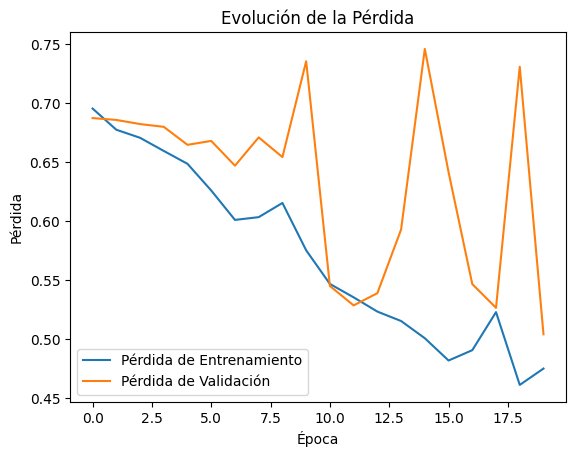

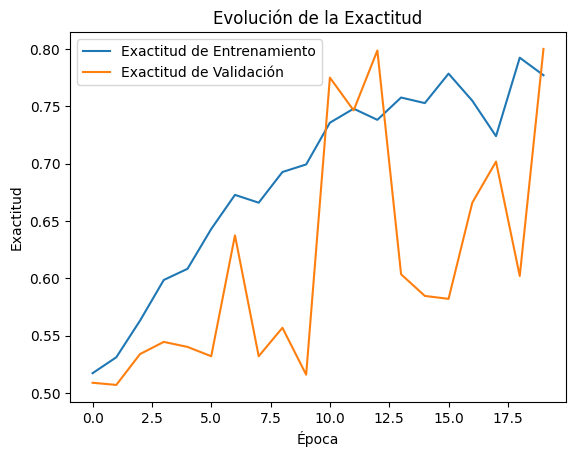

In [18]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Evolución de la Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la exactitud
plt.plot(history.history['accuracy'], label='Exactitud de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Exactitud de Validación')
plt.title('Evolución de la Exactitud')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.legend()
plt.show()

In [22]:
from IPython.display import display, HTML

html_content = """
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Gráficas</title>
</head>
<body>
    <p>Esto no es exactamente lo que buscamos, ya que la gráfica que estamos buscando se parece más a esta:</p>
    <img src="img/perdida.png" alt="Gráfica Correcta" width="250">
    <img src="img/bien_entrenado.png" alt="Gráfica Correcta" width="250">
</body>
</html>
"""

# Mostrar el contenido HTML en el notebook
display(HTML(html_content))

Crearemos un nuevo modelo con menos capas para ver que resultado obtenemos

In [10]:
model = tf.keras.models.load_model('models/13_cnn.h5')

In [20]:
# Mostrar precision y perdida del modelo
loss, acc = model.evaluate(test_generator)
print(f'Pérdida: {loss}')
print(f'Exactitud: {acc}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8078 - loss: 0.4940
Pérdida: 0.49619850516319275
Exactitud: 0.8050000071525574


## Curva ROC

In [11]:
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [22]:
# Número total de imágenes en el conjunto de entrenamiento
num_train_samples = train_generator.samples

# Inicializar arrays vacíos para X (imágenes) e y (etiquetas)
X_train = np.zeros((num_train_samples, 128, 128, 3))
y_train = np.zeros((num_train_samples, 2))  # 2 para el caso de clasificación binaria (categorical)

# Iterar sobre los generadores para extraer imágenes y etiquetas
i = 0
for batch_x, batch_y in train_generator:
    # Determinar el índice final de cada batch
    batch_size = batch_x.shape[0]
    X_train[i:i+batch_size] = batch_x
    y_train[i:i+batch_size] = batch_y
    i += batch_size
    if i >= num_train_samples:
        break  # Romper el bucle cuando se han procesado todas las imágenes

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (11879, 128, 128, 3)
y_train shape: (11879, 2)


In [23]:
# Número total de imágenes en el conjunto de prueba
num_test_samples = test_generator.samples

# Inicializar arrays vacíos para X (imágenes) e y (etiquetas)
X_test = np.zeros((num_test_samples, 128, 128, 3))
y_test = np.zeros((num_test_samples, 2))  # 2 para clasificación binaria

# Iterar sobre los generadores para extraer imágenes y etiquetas
i = 0
for batch_x, batch_y in test_generator:
    # Determinar el índice final de cada batch
    batch_size = batch_x.shape[0]
    X_test[i:i+batch_size] = batch_x
    y_test[i:i+batch_size] = batch_y
    i += batch_size
    if i >= num_test_samples:
        break  # Romper el bucle cuando se han procesado todas las imágenes

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (2000, 128, 128, 3)
y_test shape: (2000, 2)


In [ ]:
#model = tf.keras.models.load_model('models/13_cnn.h5')

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Leer el modelo
#model = tf.keras.models.load_model('models/noveno_cnn.h5')

In [21]:
# Calcular el número de pasos necesarios para recorrer todo el conjunto de prueba
steps_test = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Realizar predicciones usando el conjunto de prueba
y_pred_prob = model.predict(test_generator, steps=steps_test, verbose=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 132ms/step


In [22]:
# Obtener las etiquetas verdaderas del generador de prueba
y_true = test_generator.classes

In [23]:
# Asegurarse de que las etiquetas verdaderas (y_true) y las predicciones (y_pred_prob) tengan la misma longitud
#assert len(y_true) == len(y_pred_prob), "Las predicciones y las etiquetas verdaderas tienen diferente número de muestras."

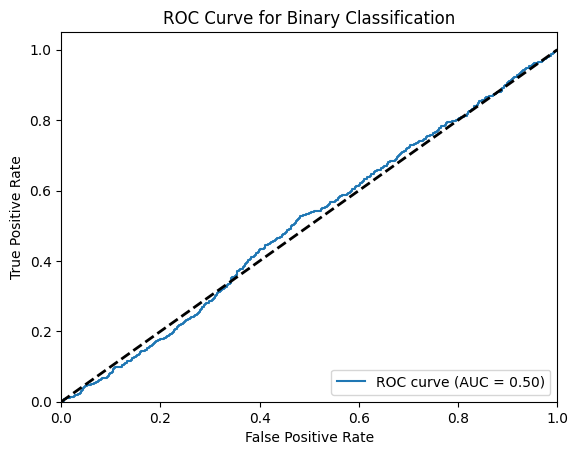

In [24]:
# Extraer las probabilidades para la clase positiva (por ejemplo, Maligno, que está en la segunda columna)
y_pred_prob_positive = y_pred_prob[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob_positive)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc='lower right')
plt.show()